# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# LOAD DATA

In [2]:
data = pd.read_csv("../Dataset/Data.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
print("Strutur data terdiri dari: \n{} baris \n{} kolom".format(data.shape[0],data.shape[1]))

Strutur data terdiri dari: 
569 baris 
33 kolom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# PREPROCESSING DATA

In [5]:
def cek_duplikate(dt):
    duplikated = dt.duplicated()
    if duplikated.any() == False:
        print("Tidak terdapat data duplikat")
    else:
        print("Terdapat data duplikat")
        print(dt[duplikated])

In [6]:
cek_duplikate(data)

Tidak terdapat data duplikat


In [7]:
print(data.nunique())

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

Karena variabel id memiliki kategori 569 (100%) berbeda satu sama lain dan Unnmaed: 32 tidak memiliki kategori (0) maka kita asumsi kedua variabel tidak diperlukan sehingga kita drop.

In [8]:
data1 = data.drop(columns=['Unnamed: 32','id'])
data1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [9]:
print("Strutur data awal terdiri dari: \n{} baris \n{} kolom".format(data.shape[0],data.shape[1]))
print("=======================================================")
print("Strutur data proses cleaning terdiri dari: \n{} baris \n{} kolom".format(data1.shape[0],data1.shape[1]))

Strutur data awal terdiri dari: 
569 baris 
33 kolom
Strutur data proses cleaning terdiri dari: 
569 baris 
31 kolom


In [10]:
data1.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Tidak ada data missing value

In [11]:
data1.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [12]:
le = LabelEncoder()
data1['diagnosis'] = le.fit_transform(data1['diagnosis'])
data1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

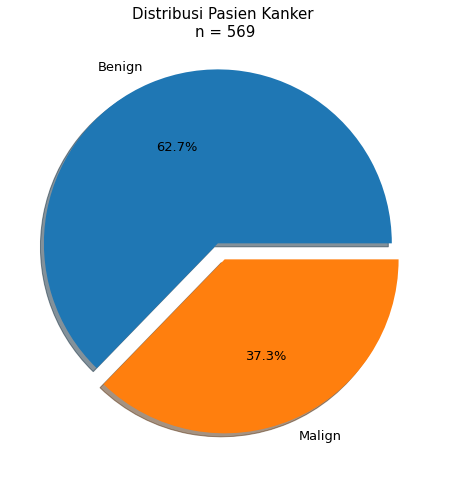

In [13]:
plt.figure(figsize = (10, 8))
labels = ['Benign', 'Malign']
plt.pie(data1['diagnosis'].value_counts(),
        autopct = '%1.1f%%',
        textprops = {'fontsize': 13},
        explode =(0.1, 0),
        labels = labels,
        shadow = True
        )
plt.title(f'Distribusi Pasien Kanker \nn = {data1.shape[0]}', fontsize = 15)
plt.ylabel('')
plt.show()

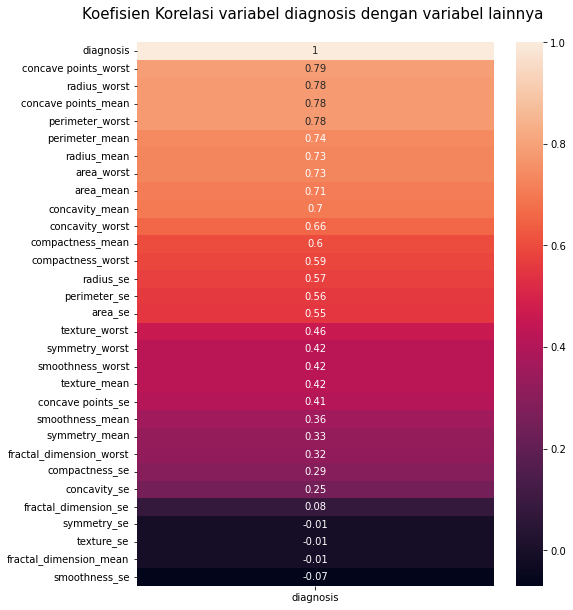

In [14]:
plt.figure(figsize = (8,10))
sns.heatmap(data1.corr().round(2).sort_values('diagnosis', ascending=False)[['diagnosis']],annot=True)
plt.title('Koefisien Korelasi variabel diagnosis dengan variabel lainnya \n', fontsize = 15)
plt.show()

In [15]:
scaling = StandardScaler()
X = data1.drop('diagnosis', axis = 1)
y = data1['diagnosis']
col = X.columns
X_sc = pd.DataFrame(X, columns = col)
X_sc[col] = scaling.fit_transform(X)
X_sc.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [16]:
estimator = SVC(kernel = 'linear')
selector = RFE(estimator, step=1)
selector = selector.fit(X_sc, y)
selector.support_

array([False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True])

In [17]:
X_ft = X_sc[['perimeter_mean','compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se','area_se', 
             'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
             'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']]
X_ft

perimeter_mean  compactness_mean  concavity_mean  concave points_mean  \
0          1.269934          3.283515        2.652874             2.532475   
1          1.685955         -0.487072       -0.023846             0.548144   
2          1.566503          1.052926        1.363478             2.037231   
3         -0.592687          3.402909        1.915897             1.451707   
4          1.776573          0.539340        1.371011             1.428493   
..              ...               ...             ...                  ...   
564        2.060786          0.219060        1.947285             2.320965   
565        1.615931         -0.017833        0.693043             1.263669   
566        0.672676         -0.038680        0.046588             0.105777   
567        1.982524          3.272144        3.296944             2.658866   
568       -1.814389         -1.150752       -1.114873            -1.261820   

     radius_se   area_se  concave points_se  fractal_dimension_se  \
0     2.489734  2.487578           0.660820              0.907083   
1     0.499255  0.742402           0.260162             -0.099444   
2     1.228676  1.181336           1.424827              0.293559   
3     0.326373 -0.288378           1.115007              2.047511   
4     1.270543  1.190357           1.144205              0.499328   
..         ...       ...                ...                   ...   
564   2.782080  2.604187           2.067178              0.167980   
565   1.300499  1.291565           0.808431             -0.490556   
566   0.184892  0.180698           0.612157              0.036727   
567   1.157935  1.009503           0.785721              0.904057   
568  -0.070279 -0.466152          -1.913447             -0.382754   

     radius_worst  texture_worst  perimeter_worst  area_worst  \
0        1.886690      -1.359293         2.303601    2.001237   
1        1.805927      -0.369203         1.535126    1.890489   
2        1.511870      -0.023974         1.347475    1.456285   
3       -0.281464       0.133984        -0.249939   -0.550021   
4        1.298575      -1.466770         1.338539    1.220724   
..            ...            ...              ...         ...   
564      1.901185       0.117700         1.752563    2.015301   
565      1.536720       2.047399         1.421940    1.494959   
566      0.561361       1.374854         0.579001    0.427906   
567      1.961239       2.237926         2.303601    1.653171   
568     -1.410893       0.764190        -1.432735   -1.075813   

     smoothness_worst  symmetry_worst  fractal_dimension_worst  
0            1.307686        2.750622                 1.937015  
1           -0.375612       -0.243890                 0.281190  
2            0.527407        1.152255                 0.201391  
3            3.394275        6.046041                 4.935010  
4            0.220556       -0.868353                -0.397100  
..                ...             ...                      ...  
564          0.378365       -1.360158                -0.709091  
565         -0.691230       -0.531855                -0.973978  
566         -0.809587       -1.104549                -0.318409  
567          1.430427        1.919083                 2.219635  
568         -1.859019       -0.048138                -0.751207  

[569 rows x 15 columns]

# SPILITING DATA (80% : 20%)

## Tanpa Feature Selection 

In [132]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

## Dengan Feature Selection 

In [133]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ft, y, test_size = 0.2, random_state = 42)

# MODELING

In [146]:
parameters = {
    'C' : [0, 0.001, 0.01, 0.1, 0,5],
    'kernel' : ["linear","sigmoid","poly","rbf"]
}

svm = SVC(random_state=42)

## Tanpa Feature Selection 

In [140]:
svm_grid = GridSearchCV(svm, parameters, n_jobs = 1, cv = 10)
svm_grid.fit(X_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=1,
             param_grid={'C': [0, 0.001, 0.01, 0.1, 0, 5],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [141]:
svm_grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [142]:
model1 = SVC(kernel = 'linear', C = 0.1, random_state=42)
model1.fit(X_train1,y_train1)
y_pred_1 = model1.predict(X_test1)

In [144]:
print(classification_report(y_test1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



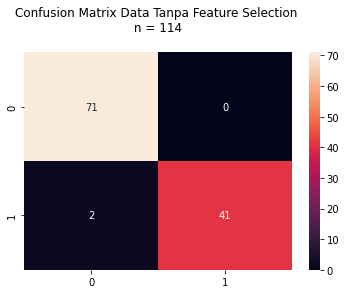

In [159]:
cm = confusion_matrix(y_test1, y_pred_1)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix Data Tanpa Feature Selection \n n = {} \n'.format(X_test1.shape[0]), fontsize=12)
plt.show()

In [145]:
print('Check for Overfitting and Underfitting \n======================================')
print('Training set score : {:.4f}'.format(model1.score(X_train1, y_train1)))
print('Testing set score  : {:.4f}'.format(model1.score(X_test1, y_test1)))

Check for Overfitting and Underfitting 
Training set score : 0.9824
Testing set score  : 0.9825


## Dengan Feature Selection  

In [147]:
svm_grid2 = GridSearchCV(svm, parameters, n_jobs = 1, cv = 10)
svm_grid2.fit(X_train2,y_train2)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=1,
             param_grid={'C': [0, 0.001, 0.01, 0.1, 0, 5],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [148]:
svm_grid2.best_params_

{'C': 5, 'kernel': 'linear'}

In [149]:
model2 = SVC(kernel = 'linear', C = 5, random_state=42)
model2.fit(X_train2,y_train2)
y_pred_2 = model2.predict(X_test2)

In [150]:
print(classification_report(y_test2, y_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



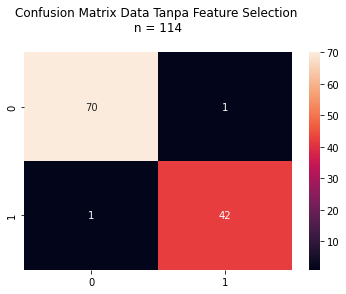

In [160]:
cm = confusion_matrix(y_test2, y_pred_2)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix Data Tanpa Feature Selection \n n = {} \n'.format(X_test2.shape[0]), fontsize=12)
plt.show()

In [152]:
print('Check for Overfitting and Underfitting \n======================================')
print('Training set score : {:.4f}'.format(model2.score(X_train2, y_train2)))
print('Testing set score  : {:.4f}'.format(model2.score(X_test2, y_test2)))

Check for Overfitting and Underfitting 
Training set score : 0.9780
Testing set score  : 0.9825
